In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as sopt

In [2]:
%matplotlib notebook

In [3]:
from imib_milano_3rd import imib_milano_3rd_class

In [4]:
syst = imib_milano_3rd_class()

In [5]:
S_b = 90e3
U_b = 400.0
Z_b = U_b**2/S_b
I_b = S_b/(np.sqrt(3)*U_b)
Omega_b = 2*np.pi*50
X_m = 3.7/Z_b
R_s = 0.023/Z_b
R_r = 0.024/Z_b
X_s = 0.086/Z_b 
X_r = 0.196/Z_b 


X_0 = (X_s + X_m)
X1  = (X_s + X_r*X_m/(X_r + X_m))
T10 = (X_r + X_m)/(Omega_b*R_r)

syst.struct[0].X_0 = X_0
syst.struct[0].X1 = X1
syst.struct[0].T10 = T10
syst.struct[0].H_m = -3

syst.struct[0].Omega_b =1
xy0 = np.zeros(syst.N_x+syst.N_y)+1.0
syst.struct[0].P_h = -0.1
syst.struct[0].Q_h = 0
xy = sopt.root(syst.ini_problem,xy0,jac=syst.ini_dae_jacobian,method='hybr')
syst.struct[0].y_ini[syst.y_ini_list.index('tau_m')]
syst.struct[0].y_ini[syst.y_ini_list.index('Q_c')]
print(xy.success)
xy.x

False


array([ 0.97937045,  0.05400878,  0.17112687,  0.17759739,  0.26313219,
        0.17304485,  0.02854785, -0.00655342,  2.85980217])

C:\programdata\anaconda3\lib\site-packages\scipy\optimize\minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


<IPython.core.display.Javascript object>


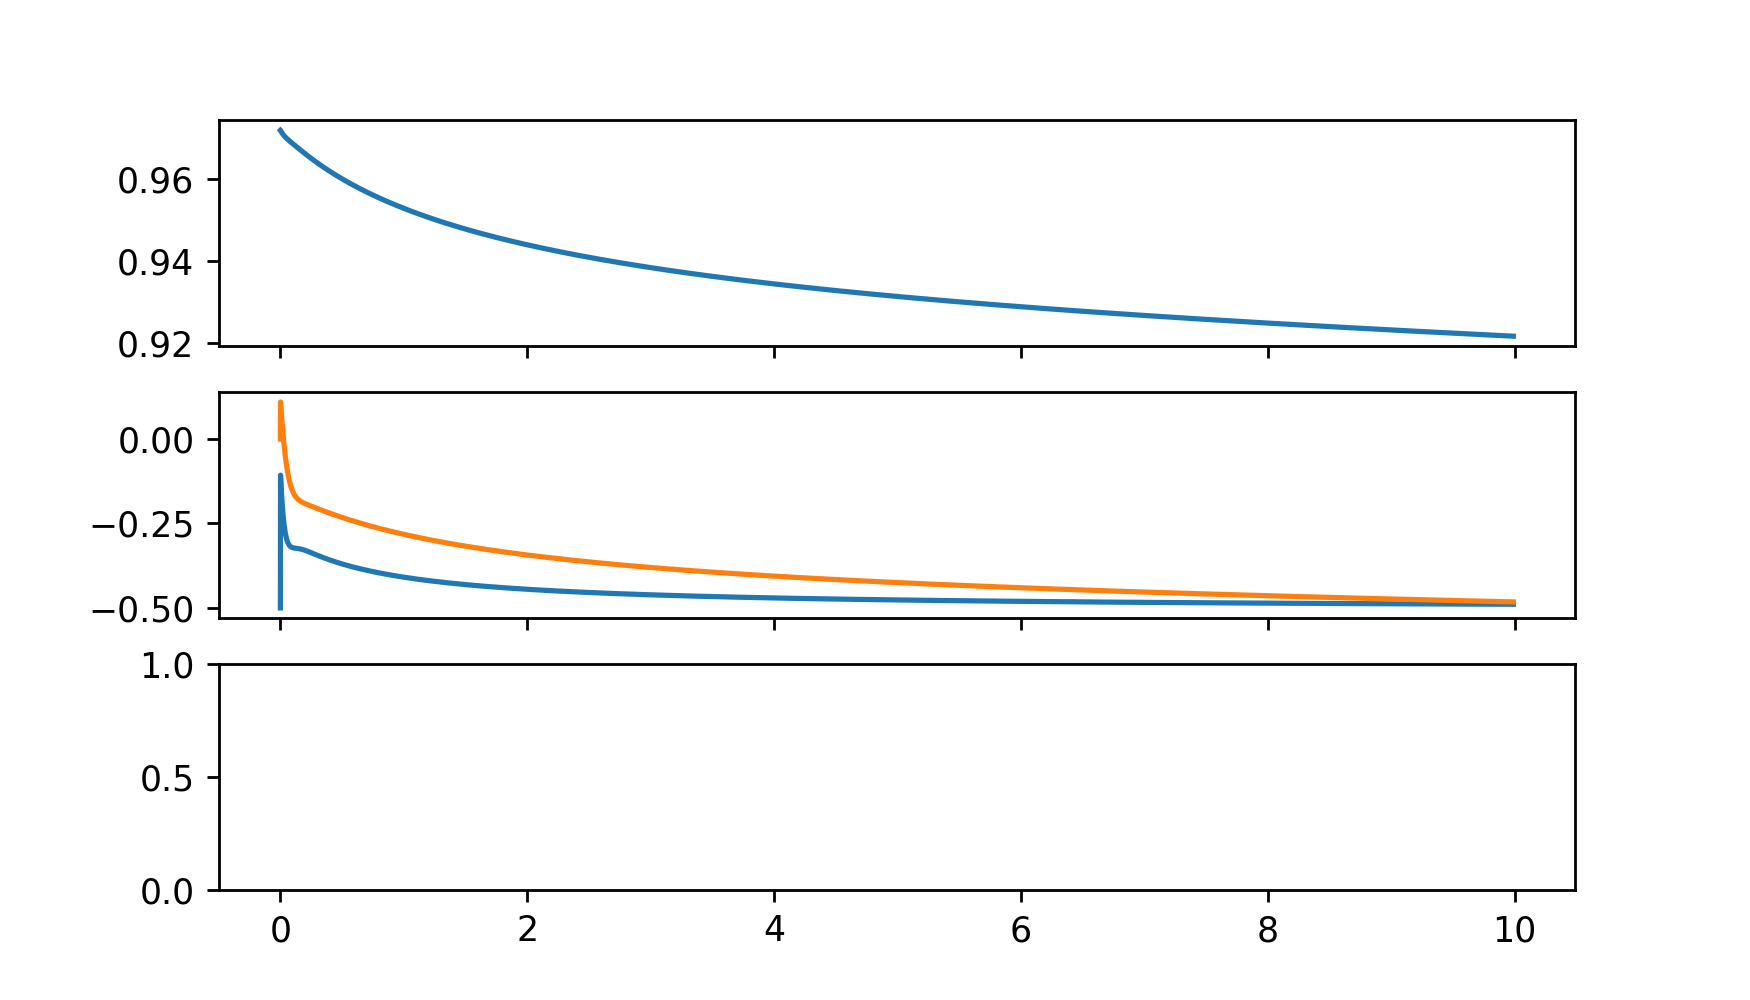

In [7]:
events = [{'t_end':1.0,'H_m':-3,'P_h':-0.5,'Q_h':0,'X_l':0.001,'Omega_b':1},
          {'t_end':10.0}]
syst.simulate(events)
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(7, 4), sharex = True)
axes[0].plot(syst.T, syst.X[:,syst.x_list.index('omega_r')])
axes[1].plot(syst.T, syst.Y[:,syst.y_list.index('P_h')])
axes[1].plot(syst.T, syst.Y[:,syst.y_list.index('Q_h')])
